## **INTRODUÇÃO**

Nesta atividade, foi proposto o desenvolvimento de um algoritmo genético no intuito de resolver uma variação do *Problema do Caixeiro Viajante* no qual um caixeiro deve visitar um conjunto de cidades exatamente uma vez e retornar à cidade de origem, de modo a iniciar sua jornada pela "Cidade 0", visitar primeiro todas as cidades de índice ímpar, e só então percorrer as cidades de índice par, gerando uma ordenação parcial dos caminhos.

---

## **CÓDIGO**

Primeiramente, claro, vamos importar as bibliotecas e funções definidas necessárias para o desenvolvimento do código.

In [1]:
from pprint import pprint
from functools import partial
from itertools import permutations

from funcoes_feras import plota_trajeto
from funcoes_feras import cria_cidades_caixeiro_2 as cria_cidades
from funcoes_feras import populacao_caixeiro_2 as cria_populacao
from funcoes_feras import funcao_objetivo_pop_caixeiro
from funcoes_feras import funcao_objetivo_caixeiro
from funcoes_feras import selecao_torneio_min as funcao_selecao
from funcoes_feras import cruzamento_ordenado_caixeiro_impares as funcao_cruzamento
from funcoes_feras import mutacao_caixeiro_impares as funcao_mutacao

E, a partir daí, já definimos as constantes do nosso algoritmo.

In [2]:
NUM_CIDADES = 8
CIDADES = cria_cidades(NUM_CIDADES)

TAMANHO_POPULACAO = 100
NUM_GERACOES = 500
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 3

Abaixo, podemos ver as cidades criados pela nossa função de forma aleatória:

In [3]:
CIDADES

{'Cidade 0': (156, 45),
 'Cidade 1': (24, 270),
 'Cidade 2': (194, 15),
 'Cidade 3': (81, 229),
 'Cidade 4': (218, 52),
 'Cidade 5': (68, 145),
 'Cidade 6': (51, 151),
 'Cidade 7': (89, 122)}

E a população que representa os caminhos possíveis dadas as cidades e o problema apresentados:

In [4]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
pprint(populacao)

[['Cidade 0',
  'Cidade 5',
  'Cidade 7',
  'Cidade 1',
  'Cidade 3',
  'Cidade 4',
  'Cidade 2',
  'Cidade 6'],
 ['Cidade 0',
  'Cidade 3',
  'Cidade 5',
  'Cidade 7',
  'Cidade 1',
  'Cidade 2',
  'Cidade 4',
  'Cidade 6'],
 ['Cidade 0',
  'Cidade 7',
  'Cidade 3',
  'Cidade 5',
  'Cidade 1',
  'Cidade 4',
  'Cidade 2',
  'Cidade 6'],
 ['Cidade 0',
  'Cidade 1',
  'Cidade 7',
  'Cidade 5',
  'Cidade 3',
  'Cidade 2',
  'Cidade 6',
  'Cidade 4'],
 ['Cidade 0',
  'Cidade 1',
  'Cidade 7',
  'Cidade 3',
  'Cidade 5',
  'Cidade 6',
  'Cidade 4',
  'Cidade 2'],
 ['Cidade 0',
  'Cidade 1',
  'Cidade 3',
  'Cidade 7',
  'Cidade 5',
  'Cidade 6',
  'Cidade 2',
  'Cidade 4'],
 ['Cidade 0',
  'Cidade 7',
  'Cidade 5',
  'Cidade 1',
  'Cidade 3',
  'Cidade 4',
  'Cidade 6',
  'Cidade 2'],
 ['Cidade 0',
  'Cidade 7',
  'Cidade 3',
  'Cidade 5',
  'Cidade 1',
  'Cidade 6',
  'Cidade 2',
  'Cidade 4'],
 ['Cidade 0',
  'Cidade 1',
  'Cidade 5',
  'Cidade 7',
  'Cidade 3',
  'Cidade 6',
  'Cidade 2'

Definimos a nossa função objetivo a partir de uma função parcial daquela que já haviamos criado anteriormente e damos o entendimento a ele sobre quais são as nossas cidades.

In [5]:
funcao_objetivo = partial(funcao_objetivo_pop_caixeiro, cidades=CIDADES)

Após isso, realizamos o loop de gerações (passando os indivíduos pelos processos de cruzamento, mutação e avaliação da função objetivo) para a criação do nosso *Hall da Fama*.

In [6]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)

    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao

E observamos qual o melhor indivíduo obtido a partir do *Hall da Fama* baseado na ordem e distância que o caixeiro percorreu, obtendo o caminho num plot de gráfico:


Melhor individuo obtido por algoritmos genéticos:
['Cidade 0', 'Cidade 7', 'Cidade 5', 'Cidade 3', 'Cidade 1', 'Cidade 6', 'Cidade 4', 'Cidade 2'] com distância: 697.1081270583313



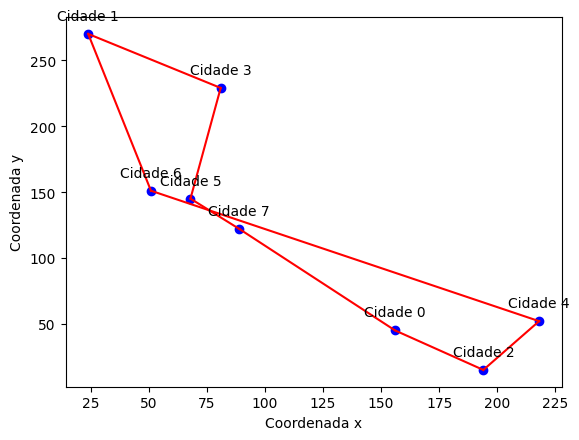

In [7]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiro(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto(CIDADES, melhor_individuo_observado)

Além disso, para analisarmos se a resposta analisada pelo nosso algoritmo genético é uma resposta ótima (ou seja, a melhor resposta possível encontrada para o nosso problema), realizamos uma busca exaustiva com as condições dadas pelo problema e achamos o melhor indivíduo:


Melhor individuo obtido por busca exaustiva:
['Cidade 0', 'Cidade 7', 'Cidade 5', 'Cidade 3', 'Cidade 1', 'Cidade 6', 'Cidade 4', 'Cidade 2'] com distância: 697.1081270583313



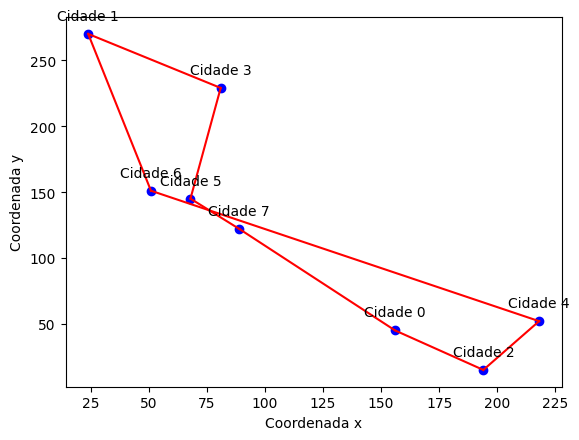

In [8]:
def extrair_num(cidade):
    return int(cidade.replace("Cidade ", ""))

if NUM_CIDADES < 10:
    fitness_otimo = float("inf")
    resposta_otima = None

    cidades = list(CIDADES.keys())

    ### separando a cidade 0 e as demais
    cidade_0 = [c for c in cidades if extrair_num(c) == 0][0]
    resto = [c for c in cidades if c != cidade_0]

    ### separando as cidades ímpares e pares
    impares = [c for c in resto if extrair_num(c) % 2 == 1]
    pares = [c for c in resto if extrair_num(c) % 2 == 0]

    ### testando todas as permutações possíveis
    for caminho_impar in permutations(impares):
        for caminho_par in permutations(pares):
            caminho_percorrido = [cidade_0] + list(caminho_impar) + list(caminho_par)
            distancia = funcao_objetivo_caixeiro(caminho_percorrido, CIDADES)

            if distancia < fitness_otimo:
                fitness_otimo = distancia
                resposta_otima = caminho_percorrido

    print()
    print("Melhor individuo obtido por busca exaustiva:")
    print(resposta_otima, "com distância:", fitness_otimo)
    print()

    plota_trajeto(CIDADES, resposta_otima)

---

## **CONCLUSÃO**

Após o desenvolvimento do algoritmo e atividade, foi possível perceber que é possível gerar uma adaptação de algoritmos genéticos para lidar com restrições no modelo, como nesse caso de ordenação parcial dos genes, mantendo uma boa capacidade de exploração do espaço de soluções e resposta (como visto na comparação realizada com a solução ótima gerada por busca exaustiva). 

Assim, foi possível perceber a eficácia do modelo em seguir as condições impostas, não permitir uma complicação gerada por indivíduos inválidos e ainda assim gerar uma solução boa para o problema.

Portanto, conclui-se que a atividade foi resolvida e o problema foi solucionado com sucesso!

---

## **REFERÊNCIAS**

**[1]** CASSAR, Daniel. Redes Neurais e Algoritmos Genéticos. 2025. Material de Aula.